<div class="alert alert-block alert-info"><b><h1>Clustering: K-Means</h1></b></div>

<div class="alert alert-block alert-info"><em>Finding Number of Clusters

<div class="alert alert-block alert-info"><em>Importing the libraries

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

<div class="alert alert-block alert-info"><em>Importing the datasets

<div class="alert alert-block alert-warning"><em>Test Dataset

In [69]:
df_test = pd.read_csv("Airline_Passenger_Satisfaction_Test_Cleaned.csv")
df_test.head()

,id,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiservice,DepartureArrivalTimeCconvenient,EaseOfOnlineBooking,...,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
4,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied


<div class="alert alert-block alert-warning"><em>Train Dataset

In [70]:
df_train = pd.read_csv("Airline_Passenger_Satisfaction_Train_Cleaned.csv")
df_train.head()

,id,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiservice,DepartureArrivalTimeCconvenient,EaseOfOnlineBooking,...,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


<div class="alert alert-block alert-info"><b><h3>Data Preparation for the Clustering Using a Test and Train Set</h3></b></div>

In [182]:
df_train = pd.read_csv("Airline_Passenger_Satisfaction_Train_Cleaned.csv")
df_test = pd.read_csv("Airline_Passenger_Satisfaction_Test_Cleaned.csv")

def conv_cat(data):
    data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
    data['CustomerType'] = data['CustomerType'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
    data['TypeOfTravel'] = data['TypeOfTravel'].map({'Personal Travel':0, 'Business travel':1})
    data['Class'] = data['Class'].map({'Business':2, 'Eco Plus':1, 'Eco':0})
    data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})
    data = pd.get_dummies(data)
    data.drop('id',axis=1,inplace=True)
    data.fillna(0,inplace=True)
    return data
df_train = conv_cat(df_train)
df_test = conv_cat(df_test)

<div class="alert alert-block alert-warning"><em>Test Dataset

In [18]:
df_test.head()

,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiservice,DepartureArrivalTimeCconvenient,EaseOfOnlineBooking,GateLocation,...,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,1,1,52,1,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,1,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,0,20,1,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,1,49,1,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1
4,0,1,16,1,0,311,3,3,3,3,...,5,4,3,1,1,2,5,0,0.0,1


<div class="alert alert-block alert-warning"><em>Train Dataset

In [19]:
df_train.head()

,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiservice,DepartureArrivalTimeCconvenient,EaseOfOnlineBooking,GateLocation,...,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


<div class="alert alert-block alert-info"><em>The Elbow Method

In [183]:
data_train = df_train.iloc[:, [2, 20]].values
data_train

array([[13, 25],
       [25,  1],
       [26,  0],
       ...,
       [30,  7],
       [22,  0],
       [27,  0]], dtype=int64)

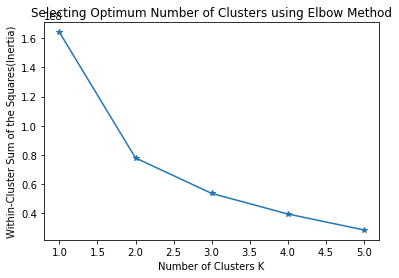

In [79]:
wcss_list = []

# Run a loop for different value of number of cluster
for i in range(1, 6):
    # Create and fit the KMeans model
    kmeans_model = KMeans(n_clusters = i, random_state = 123)
    kmeans_model.fit(data_train)
    # Add the WCSS or inertia of the clusters to the score_list
    wcss_list.append(kmeans_model.inertia_)

# Plot the inertia(WCSS) and number of clusters    
plt.plot(range(1, 6), wcss_list,  marker='*')
# set title of the plot
plt.title('Selecting Optimum Number of Clusters using Elbow Method')
# Set x-axis label
plt.xlabel('Number of Clusters K')
# Set y-axis label
plt.ylabel('Within-Cluster Sum of the Squares(Inertia)')
# Display plot
plt.show()

<div class="alert alert-block alert-info"><b><h3>K-Means Clustering - 1st Way</h3></b></div>

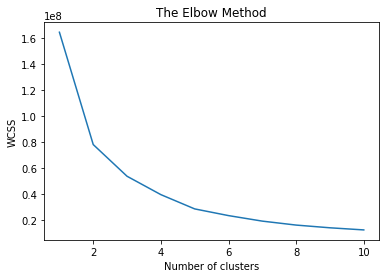

In [80]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<div class="alert alert-block alert-info"><em>Predicting Values

In [81]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_train)
y_kmeans

array([1, 1, 1, ..., 1, 1, 1])

<div class="alert alert-block alert-info"><em>Confusion Matrix & Accuracy

In [103]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = df_train['satisfaction']
# predicted values
predicted = y_kmeans

accuracy = accuracy_score(actual, predicted)
print('Accuracy : \n', accuracy)

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[0,1])
print('\n Confusion matrix : \n',matrix)

# outcome values order in sklearn
tn, fp, fn, tp = confusion_matrix(actual,predicted,labels=[0,1]).reshape(-1)
print('\n Outcome values : \n', tn, fp, fn, tp)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[0,1])
print('\n Classification report : \n',matrix)

Accuracy : 
 0.43634250928049195

 Confusion matrix : 
 [[ 6072 50379]
 [ 3050 36361]]

 Outcome values : 
 6072 50379 3050 36361

 Classification report : 
               precision    recall  f1-score   support

           0       0.67      0.11      0.18     57372
           1       0.42      0.91      0.57     39875

   micro avg       0.44      0.44      0.44     97247
   macro avg       0.54      0.51      0.38     97247
weighted avg       0.56      0.44      0.34     97247



In [83]:
from sklearn.metrics import confusion_matrix,classification_report

df_new = df_train['satisfaction']

print(confusion_matrix(df_new, kmeans.labels_))
print(classification_report(df_new, kmeans.labels_))

[[ 6072 50379   921]
 [ 3050 36361   464]
 [    0     0     0]]
              precision    recall  f1-score   support

           0       0.67      0.11      0.18     57372
           1       0.42      0.91      0.57     39875
           2       0.00      0.00      0.00         0

    accuracy                           0.44     97247
   macro avg       0.36      0.34      0.25     97247
weighted avg       0.56      0.44      0.34     97247



C:\Users\fatem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


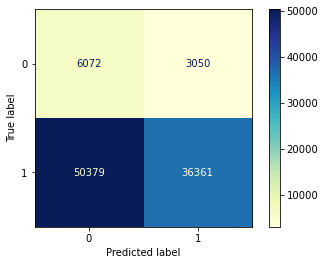

In [108]:
# actual values
actual = df_train['satisfaction']
# predicted values
predicted = y_kmeans

# labels=[1,0]

IC = type('IdentityClassifier', (), {"predict": lambda i : i, "_estimator_type": "classifier"})
plot_confusion_matrix(IC, actual, predicted, values_format='d', cmap='YlGnBu', labels=[0,1]);

<div class="alert alert-block alert-info"><em>Clustering based on Age and Departure Delay In Minutes

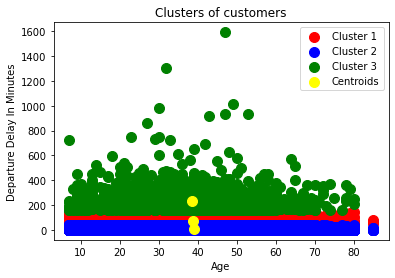

In [63]:
plt.scatter(data_train[y_kmeans == 0, 0], data_train[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_train[y_kmeans == 1, 0], data_train[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_train[y_kmeans == 2, 0], data_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Departure Delay In Minutes')
plt.legend()
plt.show()

<div class="alert alert-block alert-info"><b><h3>K-Means Clustering - 2nd Way</h3></b></div>

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [185]:
df_train = pd.read_csv("Airline_Passenger_Satisfaction_Train_Cleaned.csv")
df_test = pd.read_csv("Airline_Passenger_Satisfaction_Test_Cleaned.csv")

def conv_cat(data):
    data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
    data['CustomerType'] = data['CustomerType'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
    data['TypeOfTravel'] = data['TypeOfTravel'].map({'Personal Travel':0, 'Business travel':1})
    data['Class'] = data['Class'].map({'Business':2, 'Eco Plus':1, 'Eco':0})
    data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})
    data = pd.get_dummies(data)
    data.drop('id',axis=1,inplace=True)
    data.fillna(0,inplace=True)
    return data
df_train = conv_cat(df_train)
df_test = conv_cat(df_test)

In [186]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = df_train.append(df_test)
df.drop('ArrivalDelayInMinutes', axis=1, inplace=True)

cols_train = df[['Age', 'FlightDistance', 'DepartureDelayInMinutes']]

scaler = StandardScaler()
scaled_train = pd.DataFrame(scaler.fit_transform(cols_train), columns = cols_train.columns)

cols = ['Age', 'FlightDistance', 'DepartureDelayInMinutes']

df[cols] = scaled_train
df.head().style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiservice,DepartureArrivalTimeCconvenient,EaseOfOnlineBooking,GateLocation,FoodAndDrink,OnlineBoarding,SeatComfort,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,satisfaction
0,0,1,-1.712826,0,1,-0.711694,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0.270859,0
1,0,0,-0.926667,1,2,-0.995214,3,2,3,3,1,3,1,1,1,5,3,1,4,1,-0.359577,0
2,1,1,-0.861154,1,2,0.147687,2,2,2,2,5,5,5,5,4,3,4,4,4,5,-0.385846,1
3,1,1,-0.926667,1,2,-0.583165,2,5,5,5,2,2,2,2,2,5,3,1,4,2,-0.096896,0
4,0,1,1.431810,1,2,-1.021676,3,3,3,3,4,5,5,3,3,4,4,3,3,3,-0.385846,1


In [187]:
def elbow_met(df):
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=10).fit(df)
        kmeanModel.fit(df)
        distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Within groups sum of squares')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

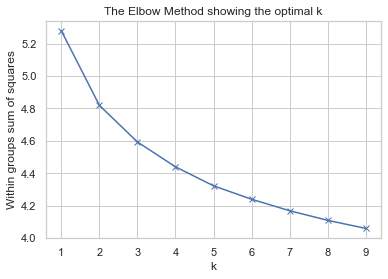

In [188]:
elbow_met(df)

In [189]:
kmeans = KMeans(n_clusters=3, random_state=10)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=10)

In [190]:
def get_melted_clusters(labels):
    result_df = dm.copy()
    
    result_df["cluster"] = labels
    melt_cluster = result_df.groupby("cluster").mean().reset_index().melt(id_vars="cluster")
    melt_cluster = melt_cluster["variable"].str.split("_" , expand=True).join(melt_cluster)
    melt_cluster = melt_cluster.rename({0 : "variable_base" , 1:"response"} , axis=1)
    melt_cluster["cluster"] = melt_cluster["cluster"].astype("category") 
    return melt_cluster

<div class="alert alert-block alert-warning"><em>Install this Module If You Do Not Have It Installed On Your Computer

In [22]:
# !pip install plotnine

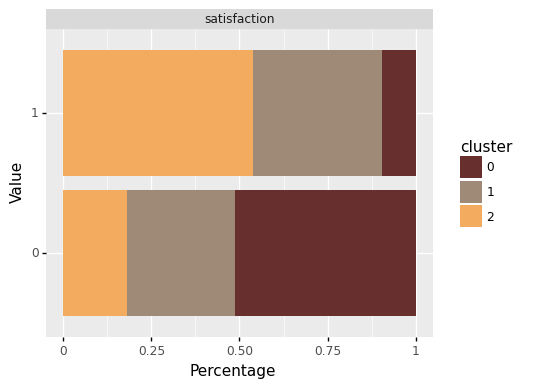

<ggplot: (147371175325)>

In [191]:
from plotnine import *

# train = pd.read_csv("Airline_Passenger_Satisfaction_Train_Cleaned.csv")
train = df_train.append(df_test)

dm = pd.get_dummies(train, columns=['satisfaction'])
mc = get_melted_clusters(kmeans.labels_)

(
    ggplot(mc[~mc["response"].isna()], aes(x="response", y="value", fill="cluster"))
    + geom_col(position="fill")
    + labs(x='Value', y='Percentage')
    + coord_flip()
    + facet_wrap("~ variable_base")
    + theme(figure_size=(5, 4))
    + scale_fill_manual(values=('#682F2F', '#9F8A78', '#F3AB60'))
)

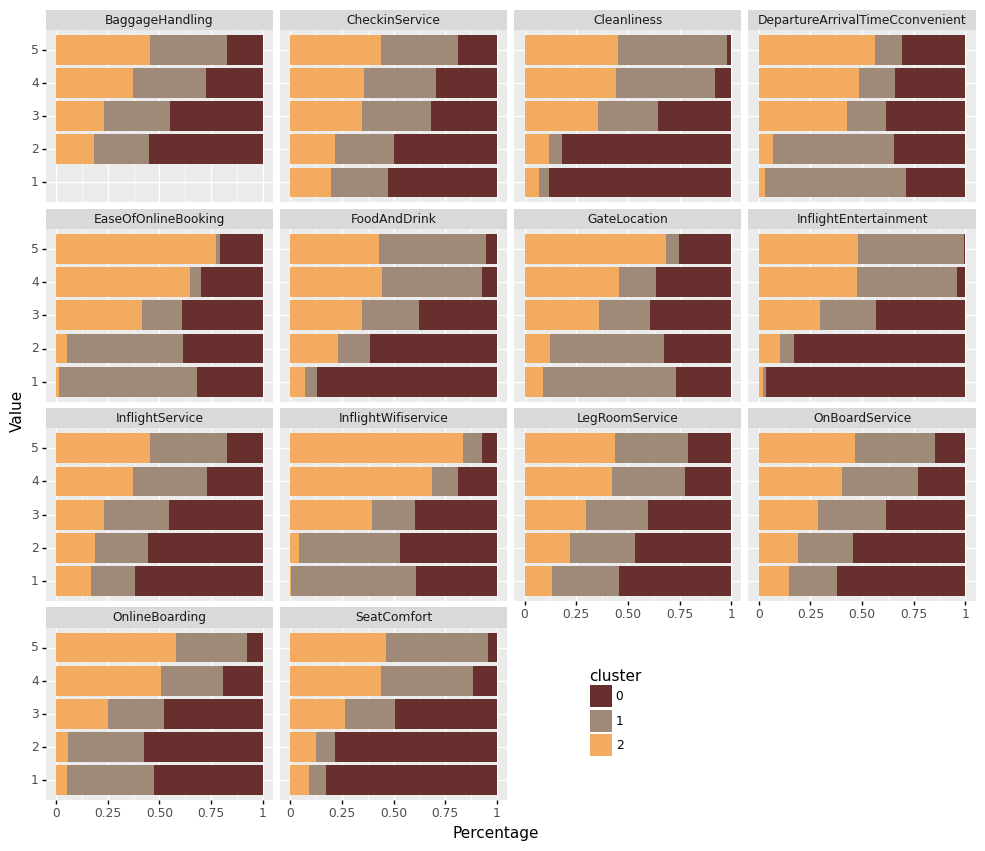

<ggplot: (147371210087)>

In [192]:
cols = ['InflightWifiservice', 'DepartureArrivalTimeCconvenient', 'EaseOfOnlineBooking',
       'GateLocation', 'FoodAndDrink', 'OnlineBoarding', 'SeatComfort', 'InflightEntertainment', 'OnBoardService',
       'LegRoomService', 'BaggageHandling', 'CheckinService', 'InflightService', 'Cleanliness']

dm = pd.get_dummies(train, columns=cols, drop_first=True)
mc = get_melted_clusters(kmeans.labels_)

(
    ggplot(mc[~mc["response"].isna()], aes(x="response", y="value", fill="cluster"))
    + geom_col(position="fill")
    + labs(x='Value', y='Percentage')
    + coord_flip()
    + facet_wrap("~ variable_base")
    + theme(figure_size=(12, 10), legend_position = (0.6, 0.2)) 
    + scale_fill_manual(values=('#682F2F', '#9F8A78', '#F3AB60'))
)

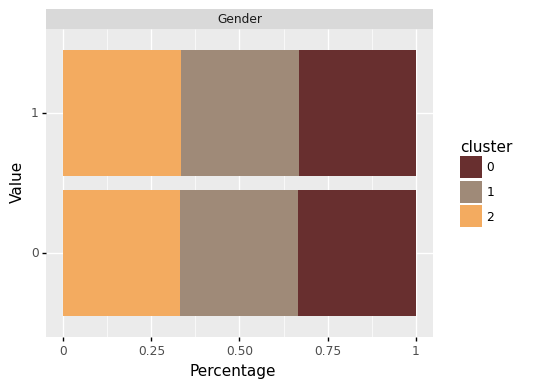

<ggplot: (147375510541)>

In [193]:
dm = pd.get_dummies(train, columns=['Gender'])
mc = get_melted_clusters(kmeans.labels_)

(
    ggplot(mc[~mc["response"].isna()], aes(x="response", y="value", fill="cluster"))
    + geom_col(position="fill")
    + labs(x='Value', y='Percentage')
    + coord_flip()
    + facet_wrap("~ variable_base")
    + theme(figure_size=(5, 4))
    + scale_fill_manual(values=('#682F2F', '#9F8A78', '#F3AB60'))
)

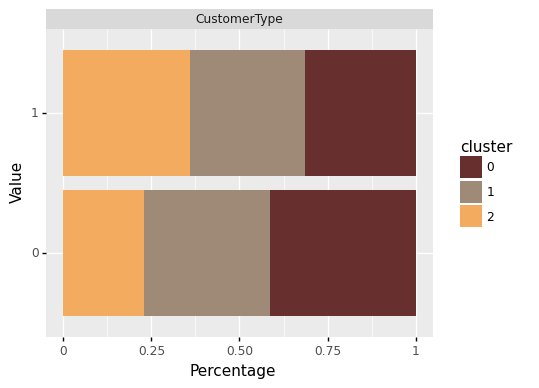

<ggplot: (144418637502)>

In [12]:
dm = pd.get_dummies(train, columns=['CustomerType'])
mc = get_melted_clusters(kmeans.labels_)

(
    ggplot(mc[~mc["response"].isna()], aes(x="response", y="value", fill="cluster"))
    + geom_col(position="fill")
    + labs(x='Value', y='Percentage')
    + coord_flip()
    + facet_wrap("~ variable_base")
    + theme(figure_size=(5, 4))
    + scale_fill_manual(values=('#682F2F', '#9F8A78', '#F3AB60'))
)

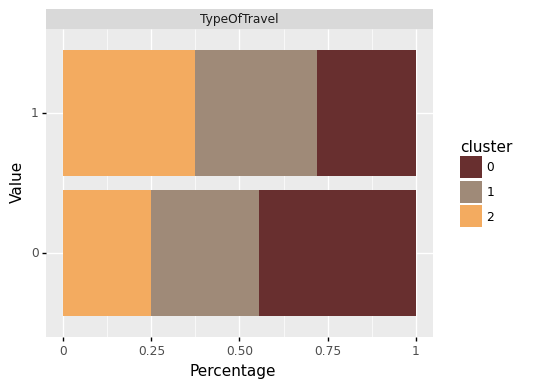

<ggplot: (144418670123)>

In [13]:
dm = pd.get_dummies(train, columns=['TypeOfTravel'])
mc = get_melted_clusters(kmeans.labels_)

(
    ggplot(mc[~mc["response"].isna()], aes(x="response", y="value", fill="cluster"))
    + geom_col(position="fill")
    + labs(x='Value', y='Percentage')
    + coord_flip()
    + facet_wrap("~ variable_base")
    + theme(figure_size=(5, 4))
    + scale_fill_manual(values=('#682F2F', '#9F8A78', '#F3AB60'))
)

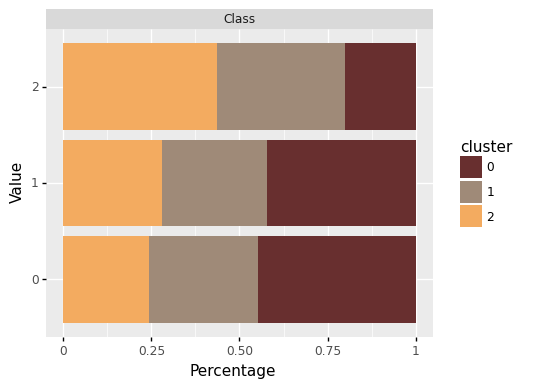

<ggplot: (144418717431)>

In [14]:
dm = pd.get_dummies(train, columns=['Class'])
mc = get_melted_clusters(kmeans.labels_)

(
    ggplot(mc[~mc["response"].isna()], aes(x="response", y="value", fill="cluster"))
    + geom_col(position="fill")
    + labs(x='Value', y='Percentage')
    + coord_flip()
    + facet_wrap("~ variable_base")
    + theme(figure_size=(5, 4))
    + scale_fill_manual(values=('#682F2F', '#9F8A78', '#F3AB60'))
)

<div class="alert alert-block alert-warning"><em>
<b>Conclusions</b>

Cluster 0:

Quite neutral satisfaction.

Features that had high ratings:
- Cleanliness
- Food and drink
- Inflight entertainment
- Features that had low ratings:
- Departure/Arrival time
- Ease of Online booking
- Gate location

Cluster 1:

Not satisfied with their experience.

Mostly disloyal costumers in Eco/Eco Plus class for personal travel.

Features that had extremely low ratings:
- Cleanliness
- Food and drink
- Inflight entertainment
- Inflight service
- Seat comfort

Cluster 2:

Mostly satisfied with their experience.

Mostly loyal costumers in buisness class for buisness travel.

Features that had extremely high ratings:
- Departure/Arrival time
- Ease of Online booking
- Gate location
- Inflight wifi service

<div class="alert alert-block alert-info"><b><h3>Accuracy Comparison

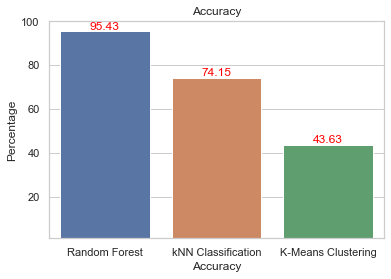

In [147]:
x = ['Random Forest', 'kNN Classification', 'K-Means Clustering']
percentage = [95.42612701546561, 74.14910025706941, 43.634250928049195]
df = pd.DataFrame(x, percentage)
df.reset_index(level=0, inplace=True)
df.columns = ['Percentage', 'Accuracy']

#make the bar plot
sns.barplot(x = 'Accuracy', y = 'Percentage', data = df)
plt.title('Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Percentage')

#place the labels
ax = plt.gca()
y_max = df['Percentage'].value_counts().max() 
ax.set_ylim(1)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
        fontsize=12, color='red', ha='center', va='bottom')